## $K$-Nearest Neighbors

In [103]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils import check_array, check_X_y

### Compute the nearest neighbor of $x$

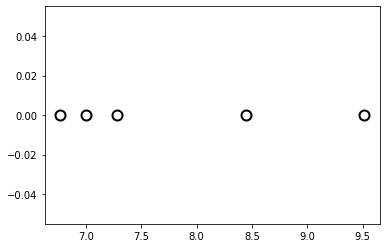

In [43]:
np.random.seed(666)
X = 10*np.random.uniform(size=5)
X.sort()
plt.plot(X, [0 for x in X], 'o', color=(0,0,0,0), mec='k', mew=2, ms=10)

In [34]:
def nn(x, X):
    """index in X of the entry closest to x"""
    return np.abs(X - x).argmin()

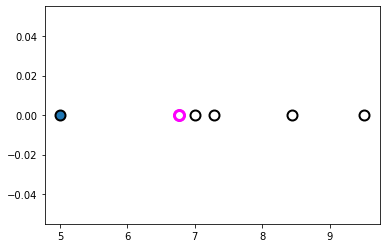

In [42]:
plt.plot(X, [0 for x in X], 'o', color=(0,0,0,0), mec='k', mew=2, ms=10)
plt.plot(5, 0, 'o', mec='k', mew=2, ms=10)
plt.plot(X[nn(5, X)], 0, 'o', color=(0,0,0,0), mec='fuchsia', mew=3, ms=10)

In [65]:
def nns(x, X, k=2):
    return np.abs(X - x).argsort()[:k]

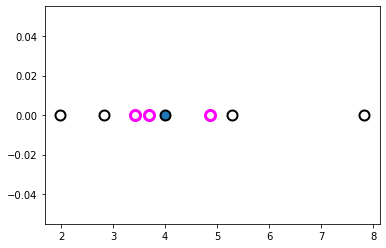

In [72]:
np.random.seed(667)
X = 10*np.random.uniform(size=7)
X.sort()

plt.plot(X, [0 for x in X], 'o', color=(0,0,0,0), mec='k', mew=2, ms=10)
plt.plot(4, 0, 'o', mec='k', mew=2, ms=10)
plt.plot(X[nns(4, X, k=3)], [0, 0, 0], 'o', color=(0,0,0,0), mec='fuchsia', mew=3, ms=10)

In [82]:
def nns_vectorized(x, X, k=2):
    return np.abs(X.reshape(-1, 1) - np.array(x).reshape(1, -1)).argsort(axis=0)[:k, :]

[[1 5 0]
 [0 4 1]
 [2 6 2]]


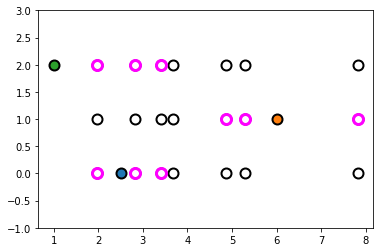

In [98]:
k = 3
xs = [2.5, 6, 1]
N = nns_vectorized(xs, X, k=k)
print(N)
plt.ylim(-1, len(xs))
for j, x in enumerate(xs):
    plt.plot(X, [j for x in X], 'o', color=(0,0,0,0), mec='k', mew=2, ms=10)
    plt.plot(x, j, 'o', mec='k', mew=2, ms=10)
    plt.plot(X[N[:,j]], [j for _ in range(k)], 'o', color=(0,0,0,0), mec='fuchsia', mew=3, ms=10)

In [193]:
class NN(BaseEstimator, RegressorMixin):
    def __init__(self, n_neighbors=3):
        setattr(self, "n_neighbors", n_neighbors)
    
    def fit(self, X, y):
        setattr(self, "_X", X)
        setattr(self, "_y", y)
        return self
        
    def predict(self, X):
        I = nns_vectorized(X, self._X, k=self.n_neighbors)
        return self._y[I].mean(axis=0)

In [250]:
M = NN(n_neighbors=4)
print(M)
print(M.get_params)
print(M.get_params())

NN(n_neighbors=4)
<bound method BaseEstimator.get_params of NN(n_neighbors=4)>
{'n_neighbors': 4}


In [112]:
M = KNeighborsRegressor(n_neighbors=2)

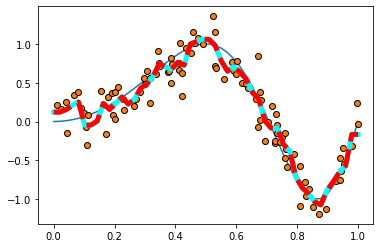

In [270]:
np.random.seed(668)

def y_true(x):
    return np.sin(x*(2*np.pi*x))

t = np.linspace(0, 1)
plt.plot(t, y_true(t))

n = 100
X = np.random.uniform(size=100)
X.sort()
y = y_true(X) + np.random.normal(0, 0.2, size=100)
plt.plot(X, y, 'o', mec='k')

k = 4
M = NN(n_neighbors=k)
M.fit(X.reshape(-1, 1), y)
y_pred = M.predict(t.reshape(-1, 1))
plt.plot(t, y_pred, '-', lw=5, color="cyan")

y_check = KNeighborsRegressor(n_neighbors=k).fit(X.reshape(-1, 1), y).predict(t.reshape(-1, 1))
# yy_pred = MM.predict(t.reshape(-1, 1))
plt.plot(t, y_check, '--', lw=5, color="red")

In [256]:
M.score

<bound method RegressorMixin.score of NN(n_neighbors=4)>

In [275]:
X_train = X[:80]
X_test = X[80:]
y_train = y[:80]
y_test = y[80:]

ks = [1, 2, 3, 4, 5, 6, 7, 8]

errs = []
for k in ks:
    M = NN(n_neighbors=k)
    M.fit(X_train, y_train)
    y_pred = M.predict(X_test)
    err = mean_squared_error(y_test, y_pred)
    errs.append(err)

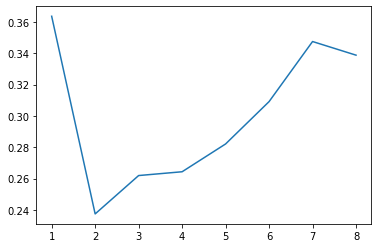

In [276]:
plt.plot(ks, errs)

In [262]:
y_test

array([-0.43761557, -0.61652013, -0.60568951, -0.82053697, -0.23643315,
       -0.79433869, -0.61204474, -0.26206505,  0.18636119,  0.15761077])

In [225]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [247]:
scores = []
for k in range(1,10):
    M = NN(n_neighbors=k)
    score = cross_val_score(M, X.reshape(-1, 1), y, cv=5, scoring="neg_mean_squared_error").mean()
    scores.append(score)

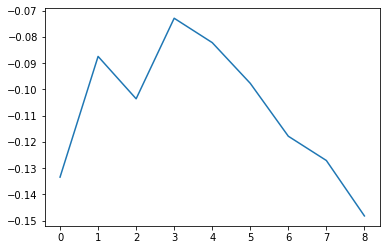

In [248]:
plt.plot(scores)

In [238]:
range(1,20)[18]

19

In [273]:
from sklearn.metrics import mean_squared_error

In [274]:
mean_squared_error?